In [1]:
from pystencils.session import *
from pystencils.data_types import cast_func

## Test field equality behaviour


Fields create with same parameters are equal

In [2]:
f1 = ps.Field.create_generic('f', spatial_dimensions=2, index_dimensions=0)
f2 = ps.Field.create_generic('f', spatial_dimensions=2, index_dimensions=0)

assert f1 == f2

In [3]:
print("Field ids equal in accesses: ", id(f1.center._field) == id(f2.center._field))
print("Field accesses equal: ", f1.center == f2.center)

Field ids equal in accesses:  True
Field accesses equal:  True


In [4]:
f1 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0)
f2 = ps.Field.create_generic('f', spatial_dimensions=2, index_dimensions=0)
assert f1 != f2

In [5]:
f1 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0)
f2 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0, dtype=np.float32)
assert f1 != f2

Properties of fields:
- `field_type`: enum distinguishing normal from index or buffer fields
- `_dtype`: data type of field elements
- `_layout`: tuple indicating the memory linearization order
- `shape`: size of field for each dimension
- `strides`: number of elements to jump over to increase coordinate of this dimension by one
- `latex_name`: optional display name when field is printed as latex

Equality compare of fields:
- field has `__eq__` and ``__hash__`` overridden
- all parameter but `latex_name` are considered for equality

## Test field access equality behaviour

In [6]:
f1 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0)
f2 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0)
assert f1.center == f2.center

In [7]:
f1 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0)
f2 = ps.Field.create_generic('f', spatial_dimensions=1, index_dimensions=0, dtype=np.float32)
assert f1.center != f2.center

In [8]:
def print_field_accesses_debug(expr):
    from pystencils import Field
    fas = list(expr.atoms(Field.Access))
    fields = list({e.field for e in fas})
    print("Field Accesses:")
    for fa in fas:
        print(f"   - {fa}, hash {hash(fa)}, offsets {fa._offsets}, index {fa._index}, {fa._hashable_content()}")
    print("")
    for i in range(len(fas)):
        for j in range(len(fas)):
            if not i < j: 
                continue
            print( f"   -> {i},{j}  {fas[i]} == {fas[j]}: {fas[i] == {fas[j]}}")
    
    print("Fields")
    for f in fields:
        print(f"  - {f}, {id(f)}, shape {f.shape}, strides {f.strides}, {f._dtype}, {f.field_type}, layout {f.layout}")
    print("")
    for i in range(len(fields)):
        for j in range(len(fields)):
            if not i < j: 
                continue
            print(f"  - {fields[i]} == {fields[j]}: {fields[i] == fields[j]}, ids equal {id(fields[i])==id(fields[j])}, hash equal {hash(fields[i])==hash(fields[j])}")

In [9]:
print_field_accesses_debug(f1.center * f2.center)

Field Accesses:
   - f[0], hash 2177071761647211096, offsets (0,), index (), (('f_C', ('commutative', True)), ((0,), (fshape_f[0],), (fstride_f[0],), -2638709558778433189, <FieldType.GENERIC: 0>, 'f'), 0)
   - f[0], hash -219035921004479174, offsets (0,), index (), (('f_C', ('commutative', True)), ((0,), (fshape_f[0],), (fstride_f[0],), 1379426851108887372, <FieldType.GENERIC: 0>, 'f'), 0)

   -> 0,1  f[0] == f[0]: False
Fields
  - f, 139911303819560, shape (fshape_f[0],), strides (fstride_f[0],), double, FieldType.GENERIC, layout (0,)
  - f, 139911303820008, shape (fshape_f[0],), strides (fstride_f[0],), float, FieldType.GENERIC, layout (0,)

  - f == f: False, ids equal False, hash equal False


## Custom fields

In [10]:
from lbmpy.sparse.update_rule_sparse import *

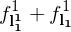

In [13]:
list_field = create_symbolic_list('l', 10, 2, np.float64)
normal_field = ps.fields("f: [2D]")
normal_field.field_type = ps.FieldType.CUSTOM

t1 = normal_field.absolute_access( (list_field[1](0),), (1,))
t2 = normal_field.absolute_access( (list_field[1](1),), (1,))
t1 + t2